## Learning the BS formula
**Assignment**: Learning the BS formula
$$
V = S_tN(d_1) - Ke^{-r\tau}N(d_2)
$$
with a small fully-connect neural network. 

Here 
$$
d_1 = \frac{1}{\sigma \sqrt{T-t}}
\left[ 
\ln \frac{S_t}{K} + (r+\frac{\sigma^2}{2})(T-t)
\right]
$$
and $\mathbf{N}$ is the cumulative distribution funciton of a normal distribution.

For this exercise, we shall use Tensorflow to build a network and train it. Install this package by following the guide: https://www.tensorflow.org/install.

Try the basic example of using Tensorflow by following the guide: https://www.tensorflow.org/tutorials/keras/classification

**a) Simulation**

For the sake of reproducibility, we fix the seed to 42.

Simulate ten thousand samples independently for each of $S, K, \sigma$ and $\tau$, such that $S_i$ and $K_i$ follow uniform $U(50, 150)$, $\sigma_i$ follows $U(0.1, 0.3)$, and $\tau$ follows $U(0., 0.5)$.

**b) Calculate $\hat{V}_i$ by BS formula**

**c) Split the dataset into training and test sets, with a ratio of 8:2**

**d) Build a shallow neural network that has a hidden layer with 10 nodes.**
Use RELU activation function for the hidden layer by default. You may also play with whatever you want. Since the output is option price which must be positive, we better use RELU that gives positive values.

**e) Train this model and plot the loss curve. Is this network well trained?**

**f) Standardize data before training a network.**

If not, think about why and how to deal with it.

Read the following article:
1. https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
2. https://builtin.com/data-science/when-and-why-standardize-your-data

Or this simpler one: https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832


In [1]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# fix the random seed because we want reproducible results，and set the random seed for numpy
seed = 42
np.random.seed(seed)

In [42]:
def bs_price(S, K, sigma, tau, r=0.):
    """
    This function implements the Black-Scholes formula.
    Args:
        S (array): stock price
        K (array): strike price
        sigma (array): volatility
        tau (array): time-to-maturity
        r (float): interest rate. Defaults to 0..

    Returns:
        C (array): option price
    """
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    C = S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)
    return C

def creat_data(N):
    """
    In order pass the test, the input to networks should be an array of four features, 
    $(S, K, \sigma, \tau)$, and the output is the price of option, a one dimensional array.
    Returns:
        X: 4 dimensional array $(S, K, \sigma, \tau)$. Shape=(number of samples, 4)
        C: 1 dimensional, option price. Shape=(number of samples, 1)
    """
    # generate the data
    S = np.random.uniform(5, 10, N)
    K = np.random.uniform(5, 10, N)
    sigma = np.random.uniform(0.2, 0.5, N)
    tau = np.random.uniform(0.25, 1, N)
    r = 0.01
    C = bs_price(S, K, sigma, tau, r)
    X = np.stack((S, K, sigma, tau), axis=1)
    N = 2000 # number of sample 
#the feature number is 4
    return X, C

In [47]:
"""""
#define the S
S = np.random.uniform(5, 10, N)
#define the X
X = np.stack((S, K, sigma, tau), axis=1)

"""
#Create the data
N=2000
S = np.random.uniform(5, 10, N)
X, C = creat_data(N)
#define the X_train, X_test, y_train, y_test,#split the dataset into train and test,with ratio 0.8:0.2
X_train, X_test, y_train, y_test = train_test_split(X, C, test_size=0.2, random_state=42)


In [51]:
"""
Use a layer fully-connect network to fit on the train data.
Save your model with model.save('my_model')
"""
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    #input_shape means the shape of input data,which should be a tuple,and the first element of tuple is the number of samples,the second element is the number of features
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model with your data before saving
# model.fit(X_train, y_train, epochs=10, batch_size=32)

"""
Save the entire model for testing purposes.
"""
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [52]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [53]:
#load the model
new_model = keras.models.load_model('my_model')


In [60]:
#standardize the data before training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [61]:
#train the model
new_model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
50/50 [==============================] - 0s 2ms/step - loss: 0.3106
Epoch 2/30
50/50 [==============================] - 0s 1ms/step - loss: 0.0633
Epoch 3/30
50/50 [==============================] - 0s 977us/step - loss: 0.0438
Epoch 4/30
50/50 [==============================] - 0s 977us/step - loss: 0.0338
Epoch 5/30
50/50 [==============================] - 0s 916us/step - loss: 0.0275
Epoch 6/30
50/50 [==============================] - 0s 957us/step - loss: 0.0234
Epoch 7/30
50/50 [==============================] - 0s 875us/step - loss: 0.0205
Epoch 8/30
50/50 [==============================] - 0s 916us/step - loss: 0.0182
Epoch 9/30
50/50 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 10/30
50/50 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 11/30
50/50 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 12/30
50/50 [==============================] - 0s 997us/step - loss: 0.0128
Epoch 13/30
50/50 [================

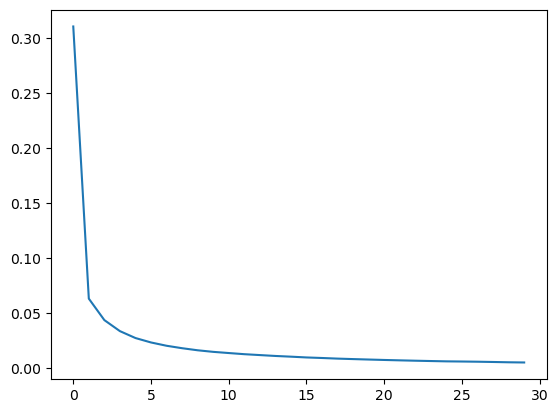

In [62]:
#plot the loss
plt.plot(new_model.history.history['loss'])

In [59]:
#evaluate the model
new_model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.0058


0.005775477271527052

In [63]:
#there are other things you can do with the model, such as predict, get the weights, etc.
y_pred = new_model.predict(X_test)
new_model.get_weights()


13/13 [==============================] - 0s 1ms/step


[array([[ 0.11346062,  0.24075155,  0.5518948 ,  0.40368834, -0.01559483,
          0.71521527, -0.43323275,  0.6090013 , -0.14269264, -0.13398936],
        [-0.5423088 ,  0.31206727, -0.5730263 , -0.5218922 ,  0.47118574,
         -0.6632374 ,  0.32594636, -0.0925634 ,  0.6024936 , -0.35385236],
        [ 0.22444363, -0.48957375, -0.3566782 , -0.44656172,  0.444254  ,
          0.22239618, -0.20543182,  0.43153986,  0.11794855, -0.315167  ],
        [-0.34861276, -0.48062035, -0.37461156,  0.3966457 , -0.4666321 ,
          0.203971  , -0.17294014,  0.03910248,  0.3302488 , -0.03031142]],
       dtype=float32),
 array([ 0.1624369 , -0.00185744,  0.01797614, -0.02862004, -0.14804351,
         0.01115569, -0.09899286,  0.06045477, -0.2944576 ,  0.11274003],
       dtype=float32),
 array([[-0.18924765,  0.4281581 ,  0.19344603,  0.60350174, -0.40689498,
         -0.1484745 , -0.4567348 , -0.06926588,  0.13333277, -0.01675772],
        [-0.10124873, -0.47502065, -0.37059692, -0.4990049 , 

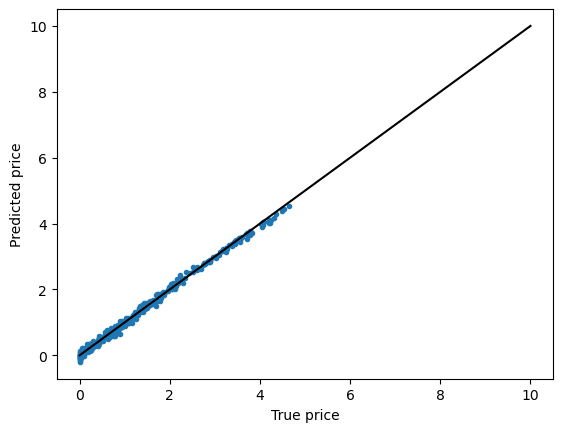

In [64]:
#plot the predicted price and the true price
plt.plot(y_test, y_pred, '.')
plt.plot([0, 10], [0, 10], 'k-')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.show()
